In [1]:
from effort2.rates.BtoV import BtoV
from effort2.formfactors.BGL import BToDStarBGL
from effort2.angular.AngularCoefficients import AngularCoefficientsDpi as AngularCoefficients

import numpy as np
from uncertainties import ufloat, correlated_values
import matplotlib.pyplot as plt
import uncertainties.unumpy as unp

In [2]:
# Masses 
m_Bzero, m_Dstarplus, m_Bplus, m_Dstarzero = (5.27963, 2.01026, 5.27932, 2.00685)

In [3]:
import gvar
lattice2 = gvar.gload("lattice_data/FitResults.PyDat")
for x in lattice2:
    print(f"{x} = {ufloat(gvar.mean(lattice2[x]), gvar.sdev(lattice2[x]))}")
    
lattice_coefficients = [
    lattice2["LQCD_a0"],
    lattice2["LQCD_a1"],
    lattice2["LQCD_a2"],
    lattice2["LQCD_b0"],
    lattice2["LQCD_b1"],
    lattice2["LQCD_b2"],
    lattice2["LQCD_c1"],
    lattice2["LQCD_c2"],
]

lattice_coefficients = correlated_values(
    gvar.mean(lattice_coefficients),
    gvar.evalcov(lattice_coefficients)
)

LQCD_a0 = 0.0330+/-0.0012
LQCD_a1 = -0.16+/-0.05
LQCD_a2 = -0.1+/-1.0
LQCD_b0 = 0.01229+/-0.00023
LQCD_b1 = -0.003+/-0.012
LQCD_b2 = 0.1+/-0.5
LQCD_c1 = -0.0058+/-0.0025
LQCD_c2 = -0.01+/-0.09
LQCD_d0 = 0.0509+/-0.0015
LQCD_d1 = -0.33+/-0.07
LQCD_d2 = -0.0+/-1.0
LQCD_RDst = 0.265+/-0.013
LQCDEXP_a0 = 0.0320+/-0.0010
LQCDEXP_a1 = -0.148+/-0.031
LQCDEXP_a2 = -0.60+/-0.22
LQCDEXP_b0 = 0.01246+/-0.00022
LQCDEXP_b1 = 0.004+/-0.005
LQCDEXP_b2 = 0.02+/-0.12
LQCDEXP_c1 = 0.0001+/-0.0009
LQCDEXP_c2 = 0.08+/-0.04
LQCDEXP_c3 = -1.1+/-0.6
LQCDEXP_d0 = 0.0526+/-0.0014
LQCDEXP_d1 = -0.19+/-0.04
LQCDEXP_d2 = -0.0+/-0.9
LQCDEXP_eVcb = 0.00149+/-0.00006
LQCDEXP_RDst = 0.2483+/-0.0013


In [4]:
BzeroToDStarBGL_lattice = BToDStarBGL(
    m_B=m_Bzero,
    m_V=m_Dstarplus,
    exp_coeff_a = lattice_coefficients[0:3],
    exp_coeff_b = lattice_coefficients[3:6],
    exp_coeff_c = lattice_coefficients[6:], 
)

angular_B0_lattice = AngularCoefficients(BzeroToDStarBGL_lattice)

rate_B0_lattice = BtoV(BzeroToDStarBGL_lattice, Vxb=40e-3, eta_EW=1.0066)

In [5]:
import matplotlib
matplotlib.rcParams.update({'font.size': 7})

def line_plotter(ax, range, line, label, color):
    p = ax.plot(range, unp.nominal_values(line), lw=1, color=color)
    ax.fill_between(
        range,
        unp.nominal_values(line) - unp.std_devs(line),
        unp.nominal_values(line) + unp.std_devs(line),
        alpha=0.5, color=p[0].get_color(),  label=label
    )
    return p


def box_plotter(ax, bins, boxes, label, color):
    bin_widths = np.array([(u-l) for l, u in zip(bins, bins[1:])])
    
    integration_width = np.array([abs(q2(w_upper) - q2(w_lower)) for i, (w_lower, w_upper) in enumerate(zip(bins, bins[1:]))])
    tmp = boxes / integration_width
    central = np.array(unp.nominal_values(tmp))
    uncertainty = np.array(unp.std_devs(tmp))
    p = ax.bar(
        x=[(u-l)/2 + l for l, u in zip(bins, bins[1:])], 
        width=bin_widths,
        bottom=central-uncertainty,
        height=2*uncertainty,
        label=label,
        alpha=1,
        lw=1,
        color=color,
        facecolor="none",
        edgecolor=color
    )
    return p

J_labels = {
    "J1s": r"$\hat{J}_{1s}$",
    "J1c": r"$\hat{J}_{1c}$",
    "J2s": r"$\hat{J}_{2s}$",
    "J2c": r"$\hat{J}_{2c}$",
    "J3": r"$\hat{J}_{3}$",
    "J4": r"$\hat{J}_{4}$",
    "J5": r"$\hat{J}_{5}$",
    "J6s": r"$\hat{J}_{6s}$",
    "J6c": r"$\hat{J}_{6c}$",
    "J7": r"$\hat{J}_{7}$",
    "J8": r"$\hat{J}_{8}$",
    "J9": r"$\hat{J}_{9}$",
}

In [6]:
Js = ["J1s", "J1c", "J2s", "J2c", "J3", "J4", "J5", "J6s", "J6c", "J7", "J8", "J9"]

J_functions_lattice = {
    'J1s': lambda q2: angular_B0_lattice.J1s(q2),
    'J1c': lambda q2: angular_B0_lattice.J1c(q2),
    'J2s': lambda q2: angular_B0_lattice.J2s(q2),
    'J2c': lambda q2: angular_B0_lattice.J2c(q2),
    'J3':  lambda q2: angular_B0_lattice.J3(q2),
    'J4':  lambda q2: angular_B0_lattice.J4(q2),
    'J5':  lambda q2: angular_B0_lattice.J5(q2),
    'J6s': lambda q2: angular_B0_lattice.J6s(q2),
    'J6c': lambda q2: angular_B0_lattice.J6c(q2),
    'J7':  lambda q2: angular_B0_lattice.J7(q2),
    'J8':  lambda q2: angular_B0_lattice.J8(q2),
    'J9':  lambda q2: angular_B0_lattice.J9(q2),
    'Norm': angular_B0_lattice.Norm()
}

In [7]:
w_range = np.linspace(*BzeroToDStarBGL_lattice.kinematics.w_range_numerical_stable)
w_bins = np.array([BzeroToDStarBGL_lattice.kinematics.w_min, *np.arange(1.1, 1.50, step=0.10), BzeroToDStarBGL_lattice.kinematics.w_max])
w_bin_edges = np.array([(lower, upper) for lower, upper in zip(w_bins, w_bins[1:])])

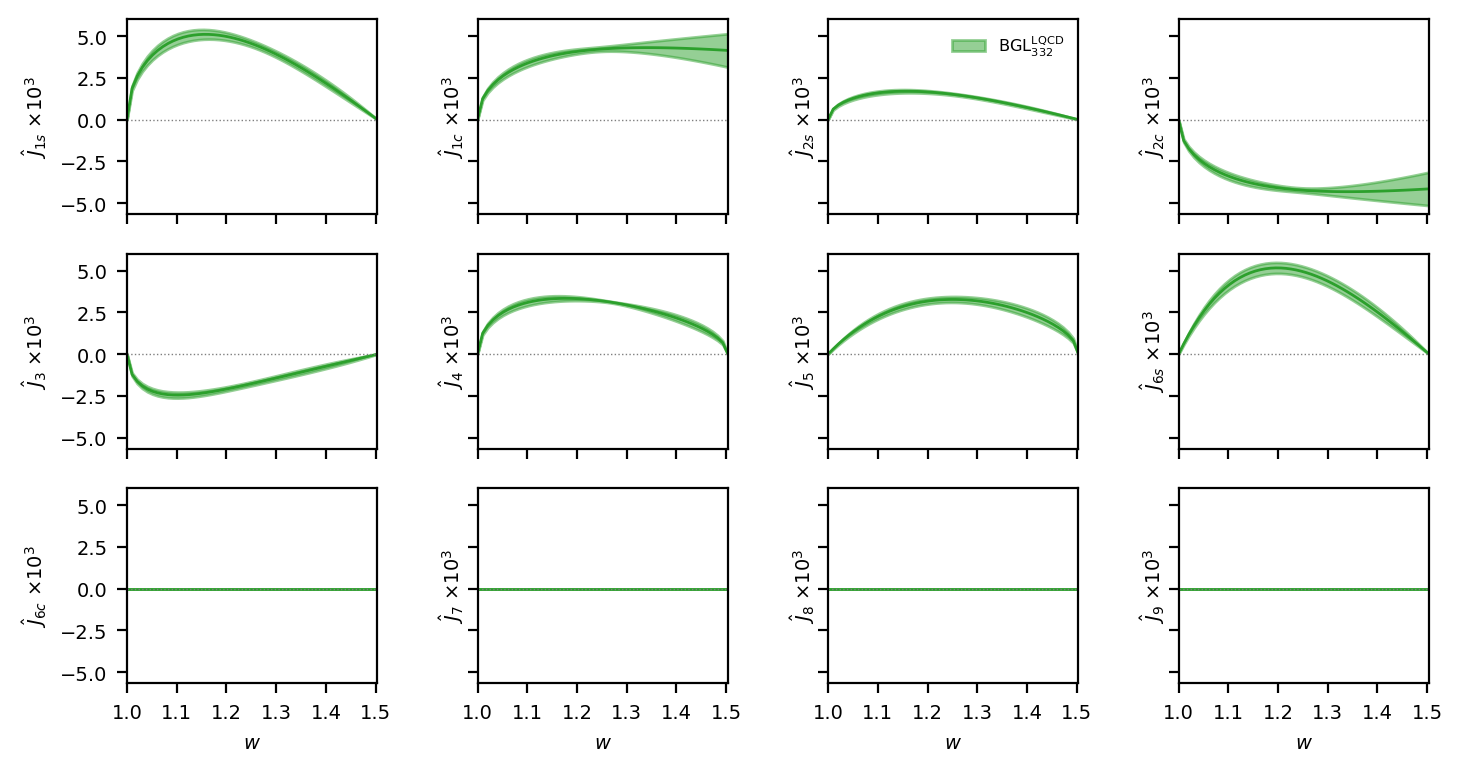

CPU times: user 4.39 s, sys: 316 ms, total: 4.7 s
Wall time: 4.24 s


In [8]:
%%time
import matplotlib
matplotlib.rcParams.update({'font.size': 7})

fig, ax = plt.subplots(dpi=200, figsize=(8.4, 4.4), nrows=3, ncols=4, sharex=True, sharey=True)

line_plotter(ax[0, 0], w_range, np.array([1e3 * J_functions_lattice["J1s"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[0, 1], w_range, np.array([1e3 * J_functions_lattice["J1c"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[0, 2], w_range, np.array([1e3 * J_functions_lattice["J2s"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[0, 3], w_range, np.array([1e3 * J_functions_lattice["J2c"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[1, 0], w_range, np.array([1e3 * J_functions_lattice["J3"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[1, 1], w_range, np.array([1e3 * J_functions_lattice["J4"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[1, 2], w_range, np.array([1e3 * J_functions_lattice["J5"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[1, 3], w_range, np.array([1e3 * J_functions_lattice["J6s"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[2, 0], w_range, np.array([1e3 * J_functions_lattice["J6c"](q2) / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[2, 1], w_range, np.array([1e3 * J_functions_lattice["J7"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[2, 2], w_range, np.array([1e3 * J_functions_lattice["J8"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")
line_plotter(ax[2, 3], w_range, np.array([1e3 * J_functions_lattice["J9"](q2)  / J_functions_lattice["Norm"] for q2 in angular_B0_lattice.FF.kinematics.q2(w_range)]), r"BGL$^{\rm LQCD}_{332}$", color="tab:green")


row = 0
col = 0
for J in Js:
    
    if row == 2:
        ax[row, col].set_xlabel(r"$w$")
    ax[row, col].set_xticks([1.0, 1.1, 1.2, 1.3, 1.4, 1.5], minor=False)
    ax[row, col].set_ylabel(f"{J_labels[J]}" + r" $\times 10^3$")
    ax[row, col].set_xlim(1, max(w_range))
    ax[row, col].axhline(0, color="tab:grey", ls="dotted", lw=0.5)
    
    col += 1
    if col == 4:
        row += 1
        col = 0

ax[0, 2].legend(loc="upper right", frameon=False, fontsize="small", ncol=1)

plt.subplots_adjust(wspace=0.4, hspace=0.2)
plt.show()
plt.close()

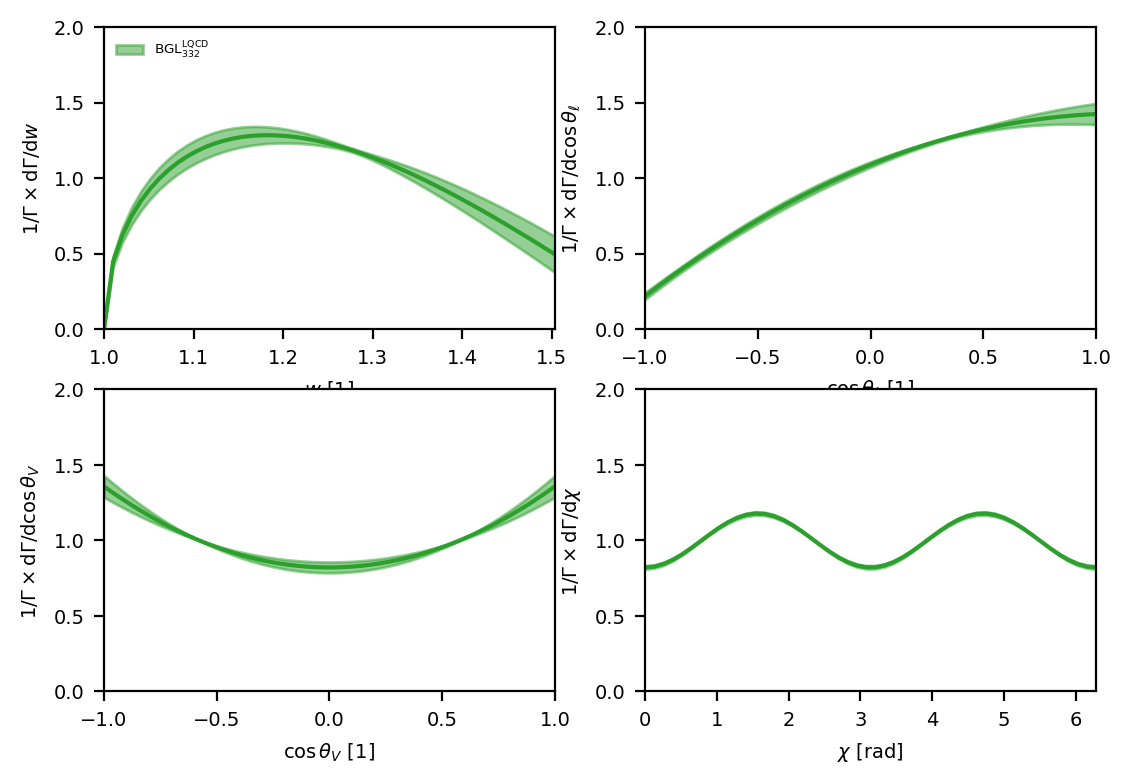

In [9]:
w_range = np.linspace(*rate_B0_lattice.kinematics.w_range_numerical_stable)
cosL_range = np.linspace(*rate_B0_lattice.kinematics.cosL_range)
cosV_range = np.linspace(*rate_B0_lattice.kinematics.cosV_range)
chi_range = np.linspace(*rate_B0_lattice.kinematics.chi_range)

total_rate2 = rate_B0_lattice.Gamma()
w_rate2     = [rate_B0_lattice.dGamma_dw(w) / total_rate2       * (max(w_range) - min(w_range))       for w in w_range]
cosL_rate2  = [rate_B0_lattice.dGamma_dcosL(w) / total_rate2 * (max(cosL_range) - min(cosL_range)) for w in cosL_range]
cosV_rate2  = [rate_B0_lattice.dGamma_dcosV(w) / total_rate2 * (max(cosV_range) - min(cosV_range)) for w in cosV_range]
chi_rate2   = [rate_B0_lattice.dGamma_dchi(w) / total_rate2   * (max(chi_range) - min(chi_range))   for w in chi_range]

fig, ax = plt.subplots(dpi=200, figsize=(6.4, 4.4), nrows=2, ncols=2, sharex=False, sharey=False)

ax[0, 0].plot(w_range, unp.nominal_values(w_rate2), color="tab:green")
ax[0, 0].fill_between(
    w_range,
    unp.nominal_values(w_rate2) + unp.std_devs(w_rate2),
    unp.nominal_values(w_rate2) - unp.std_devs(w_rate2),
    alpha=0.5, color="tab:green", label=r"BGL$^{\rm LQCD}_{332}$"
)
ax[0, 1].plot(cosL_range, unp.nominal_values(cosL_rate2), color="tab:green")
ax[0, 1].fill_between(
    cosL_range,
    unp.nominal_values(cosL_rate2) + unp.std_devs(cosL_rate2),
    unp.nominal_values(cosL_rate2) - unp.std_devs(cosL_rate2),
    alpha=0.5, color="tab:green"
)
ax[1, 0].plot(cosV_range, unp.nominal_values(cosV_rate2), color="tab:green")
ax[1, 0].fill_between(
    cosV_range, 
    unp.nominal_values(cosV_rate2) + unp.std_devs(cosV_rate2),
    unp.nominal_values(cosV_rate2) - unp.std_devs(cosV_rate2),
    alpha=0.5, color="tab:green"
)
ax[1, 1].plot(chi_range, unp.nominal_values(chi_rate2), color="tab:green")
ax[1, 1].fill_between(
    chi_range, 
    unp.nominal_values(chi_rate2) + unp.std_devs(chi_rate2),
    unp.nominal_values(chi_rate2) - unp.std_devs(chi_rate2),
    alpha=0.5, color="tab:green"
)


ax[0, 0].set_xlim(1, max(w_range))
ax[0, 1].set_xlim(min(cosL_range), max(cosL_range))
ax[1, 0].set_xlim(min(cosV_range), max(cosV_range))
ax[1, 1].set_xlim(min(chi_range), max(chi_range))

ax[0, 0].set_ylim(0, 2)
ax[0, 1].set_ylim(0, 2)
ax[1, 0].set_ylim(0, 2)
ax[1, 1].set_ylim(0, 2)

ax[0, 0].set_xlabel(r"$w$ [1]")
ax[0, 1].set_xlabel(r"$\cos\theta_\ell$ [1]")
ax[1, 0].set_xlabel(r"$\cos\theta_V$ [1]")
ax[1, 1].set_xlabel(r"$\chi$ [rad]")

ax[0, 0].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}w$")
ax[0, 1].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\cos\theta_\ell$")
ax[1, 0].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\cos\theta_V$")
ax[1, 1].set_ylabel(r"$1 / \Gamma \times \mathrm{d} \Gamma / \mathrm{d}\chi$")

ax[0, 0].legend(loc="upper left", frameon=False, fontsize="x-small", ncol=1)


plt.show()
plt.close()